In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
IR_df = pd.read_csv('IR.csv')
IR_df.head() #date type is object, not very good, only 31 Dec of 1975to2014b

,DATE,RATE
0,31 Dec 1975,11.0000
1,31 Dec 1976,11.1137
2,31 Dec 1977,8.8772
3,31 Dec 1978,9.1059
4,31 Dec 1979,13.6863


In [145]:
IR_date = pd.to_datetime(IR_df.loc[:,'DATE'])
IR_year = pd.DatetimeIndex(IR_date).year
IR_df['DATE'] = IR_year
IR_df = IR_df.rename(columns = {'DATE':'year'} )
IR_df['RATE'] = (IR_df['RATE'].values).astype(np.float) # change the type to number
IR_df= IR_df.rename(columns = {'RATE':'IR rate'})
IR_df.head()

,year,IR rate
0,1975,11.0000
1,1976,11.1137
2,1977,8.8772
3,1978,9.1059
4,1979,13.6863


In [146]:
Repossession_df = pd.read_csv('Repossession.csv')
Repossession_df.head() #from 1969 to 2013

,year,num_mortage,num_possession
0,1969,"4,017,000","3,370"
1,1970,"4,171,000","3,760"
2,1971,"4,506,000","2,800"
3,1972,"4,770,000","1,760"
4,1973,"4,862,000","1,220"


In [147]:
Repossession_df['num_mortage'] = Repossession_df['num_mortage'].str.replace(",","")
Repossession_df['num_mortage'] = (Repossession_df['num_mortage'].values).astype(np.float)
Repossession_df['num_possession'] = Repossession_df['num_possession'].str.replace(",","")
Repossession_df['num_possession'] = (Repossession_df['num_possession'].values).astype(np.float)
Repossession_df.head()

,year,num_mortage,num_possession
0,1969,4017000.0,3370.0
1,1970,4171000.0,3760.0
2,1971,4506000.0,2800.0
3,1972,4770000.0,1760.0
4,1973,4862000.0,1220.0


In [148]:
Unemployment_df = pd.read_csv('Unemployment.csv')
Unemployment_df = Unemployment_df.rename(columns = {'Year':'year'}) #same columnname as repossession_df
Unemployment_df = Unemployment_df.rename(columns = {'Rate':'Unemployment rate'})
Unemployment_df['Unemployment rate'] = (Unemployment_df['Unemployment rate'].values).astype(np.float)
Unemployment_df.head() #date is also the year from 1971 to 2017

,year,Unemployment rate
0,1971,4.1
1,1972,4.3
2,1973,3.7
3,1974,3.7
4,1975,4.5


In [149]:
merged_df = pd.merge(Repossession_df,Unemployment_df, on = 'year')
# merged_df = pd.merge(merged_df, IR_df, on='year')
merged_df.head()

,year,num_mortage,num_possession,Unemployment rate
0,1971,4506000.0,2800.0,4.1
1,1972,4770000.0,1760.0,4.3
2,1973,4862000.0,1220.0,3.7
3,1974,4910000.0,3290.0,3.7
4,1975,5076000.0,4870.0,4.5


In [150]:
merged_df_2 = pd.merge(merged_df, IR_df, on='year')
print('head:','\n',merged_df_2.head(3))
print('tail:','\n',merged_df_2.tail(3))

head: 
    year  num_mortage  num_possession  Unemployment rate  IR rate
0  1975    5076000.0          4870.0                4.5  11.0000
1  1976    5322000.0          4950.0                5.4  11.1137
2  1977    5582000.0          4680.0                5.6   8.8772
tail: 
     year  num_mortage  num_possession  Unemployment rate  IR rate
36  2011   11384000.0         37300.0                8.1      0.5
37  2012   11284000.0         33900.0                8.0      0.5
38  2013   11186000.0         28900.0                7.6      0.5


simple regression model

In [157]:
import statsmodels.api as sm

In [158]:
y = merged_df_2['IR rate']
y = y.values
X = (merged_df_2.loc[:,['num_mortage','num_possession','Unemployment rate']]).values
X_new = sm.add_constant(X)

In [159]:
model_SLR = sm.OLS(y,X_new).fit()
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     17.36
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.48e-07
Time:                        01:10:03   Log-Likelihood:                -93.853
No. Observations:                  39   AIC:                             195.7
Df Residuals:                      35   BIC:                             202.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9354      3.354      6.539      0.000      15.126      28.745
x1         -1.629e-06   2.77e-07     -5.877      0.000   -2.19e-06   -1.07e-06
x2          3.654e-05   3.33e-05      1.096      0.280   -3.11e-05       0.000
x3             0.0038      0.246      0.016      0.988      -0.495       0.503
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.085
Skew:                           0.112   Prob(JB):                        0.958
Kurtosis:                       3.047   Cond. No.                     7.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

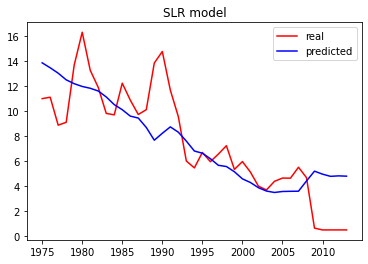

In [160]:
y_SLR = model_SLR.predict(X_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_SLR,'b')
plt.legend(['real','predicted'])
plt.title('SLR model')
plt.show()

In [161]:
model_SLR.aic

195.7062999205014

In [162]:

X_SLR_2 = X_new[:,:-1]
model_SLR_2 = sm.OLS(y,X_SLR_2).fit()
model_SLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     26.79
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           7.48e-08
Time:                        01:10:05   Log-Likelihood:                -93.853
No. Observations:                  39   AIC:                             193.7
Df Residuals:                      36   BIC:                             198.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9766      2.019     10.887      0.000      17.883      26.071
x1         -1.631e-06    2.4e-07     -6.802      0.000   -2.12e-06   -1.14e-06
x2          3.681e-05   2.82e-05      1.305      0.200   -2.04e-05     9.4e-05
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.082
Skew:                           0.110   Prob(JB):                        0.960
Kurtosis:                       3.044   Cond. No.                     4.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_SLR,model_SLR_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,35.0,281.087674,0.0,NaN,NaN,NaN
1,36.0,281.089606,-1.0,-0.001932,0.000247,NaN


polynomial regression model

In [164]:
x1 = X
x2 = np.power(X,2)
x3 = np.power(X,3)
x4 = np.power(X,4)
x_poly_1 = np.concatenate([x1,x2,x3,x4],axis = 1)
x_poly_1_new = sm.add_constant(x_poly_1)

In [165]:



model_PR_1 = sm.OLS(y,x_poly_1_new).fit()
model_PR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     21.49
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           7.20e-07
Time:                        01:10:07   Log-Likelihood:                -96.306
No. Observations:                  39   AIC:                             198.6
Df Residuals:                      36   BIC:                             203.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.583e-28   2.37e-28      3.204      0.003    2.78e-28    1.24e-27
x1         -2.611e-15   8.15e-16     -3.204      0.003   -4.26e-15   -9.58e-16
x2         -7.758e-23   2.42e-23     -3.204      0.003   -1.27e-22   -2.85e-23
x3          3.643e-26   1.14e-26      3.204      0.003    1.34e-26    5.95e-26
x4          9.593e-15   2.99e-15      3.204      0.003    3.52e-15    1.57e-14
x5         -3.917e-18   1.22e-18     -3.204      0.003    -6.4e-18   -1.44e-18
x6         -2.956e-26   9.23e-27     -3.204      0.003   -4.83e-26   -1.08e-26
x7          7.995e-20   5.75e-21     13.910      0.000    6.83e-20    9.16e-20
x8         -1.235e-13   3.85e-14     -3.204      0.003   -2.02e-13   -4.53e-14
x9         -3.266e-25   1.02e-25     -3.204      0.003   -5.33e-25    -1.2e-25
x10        -6.759e-27   5.12e-28    -13.201      0.000    -7.8e-27   -5.72e-27
x11         1.589e-18   5.35e-19      2.969      0.005    5.03e-19    2.67e-18
x12         -2.42e-24   7.55e-25     -3.204      0.003   -3.95e-24   -8.88e-25
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.557
Skew:                           0.592   Prob(JB):                        0.278
Kurtosis:                       2.585   Cond. No.                     7.06e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+31. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

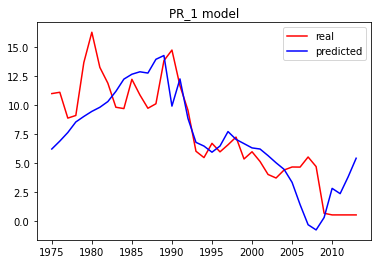

In [166]:
y_PR_1 = model_PR_1.predict(x_poly_1_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PR_1,'b')
plt.legend(['real','predicted'])
plt.title('PR_1 model')
plt.show()

In [167]:
x5 = np.power(x1,5)
x_poly_2_new = np.concatenate([x_poly_1_new,x5],axis = 1)
model_PR_2 = sm.OLS(y,x_poly_2_new).fit()
model_PR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.035
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   -0.6090
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               1.00
Time:                        01:10:08   Log-Likelihood:                -112.30
No. Observations:                  39   AIC:                             230.6
Df Residuals:                      36   BIC:                             235.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e-49   3.58e-49      1.010      0.319   -3.65e-49    1.09e-48
x1          5.225e-30   5.17e-30      1.010      0.319   -5.27e-30    1.57e-29
x2         -5.817e-38   5.76e-38     -1.010      0.319   -1.75e-37    5.87e-38
x3          3.793e-40   3.76e-40      1.010      0.319   -3.82e-40    1.14e-39
x4          8.043e-36   7.96e-36      1.010      0.319   -8.11e-36    2.42e-35
x5         -3.936e-39    3.9e-39     -1.010      0.319   -1.18e-38    3.97e-39
x6          1.325e-47   1.31e-47      1.010      0.319   -1.34e-47    3.98e-47
x7          2.374e-29   2.35e-29      1.010      0.319   -2.39e-29    7.14e-29
x8         -3.091e-34   3.06e-34     -1.010      0.319    -9.3e-34    3.12e-34
x9           1.31e-46    1.3e-46      1.010      0.319   -1.32e-46    3.94e-46
x10         8.606e-27   1.02e-27      8.406      0.000    6.53e-27    1.07e-26
x11        -2.313e-29   2.29e-29     -1.010      0.319   -6.96e-29    2.33e-29
x12         1.688e-45   1.67e-45      1.010      0.319    -1.7e-45    5.08e-45
x13        -7.369e-34    9.1e-35     -8.100      0.000   -9.21e-34   -5.52e-34
x14        -1.708e-24   1.69e-24     -1.010      0.319   -5.14e-24    1.72e-24
x15         2.341e-44   2.32e-44      1.010      0.319   -2.36e-44    7.04e-44
==============================================================================
Omnibus:                        3.148   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.110
Skew:                           0.373   Prob(JB):                        0.348
Kurtosis:                       2.138   Cond. No.                     4.61e+39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+39. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

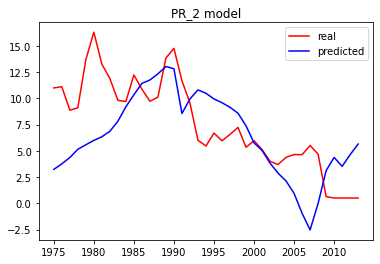

In [168]:
y_PR_2 = model_PR_2.predict(x_poly_2_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PR_2,'b')
plt.legend(['real','predicted'])
plt.title('PR_2 model')
plt.show()

In [169]:
x_poly_3_new = x_poly_1_new[:,:10]
model_PR_3 = sm.OLS(y,x_poly_3_new).fit()
model_PR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     30.91
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           6.02e-10
Time:                        01:10:09   Log-Likelihood:                -86.386
No. Observations:                  39   AIC:                             180.8
Df Residuals:                      35   BIC:                             187.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.709e-19    2.8e-19      2.751      0.009    2.02e-19    1.34e-18
x1          2.142e-12   7.79e-13      2.751      0.009    5.61e-13    3.72e-12
x2         -1.235e-13   4.49e-14     -2.751      0.009   -2.15e-13   -3.24e-14
x3          -7.15e-18    2.6e-18     -2.751      0.009   -1.24e-17   -1.87e-18
x4          6.083e-13   3.45e-14     17.608      0.000    5.38e-13    6.78e-13
x5         -4.326e-09   1.57e-09     -2.751      0.009   -7.52e-09   -1.13e-09
x6         -1.263e-16   4.59e-17     -2.751      0.009    -2.2e-16   -3.31e-17
x7         -4.953e-20   3.09e-21    -16.023      0.000   -5.58e-20   -4.33e-20
x8           5.68e-14   2.21e-14      2.565      0.015    1.18e-14    1.02e-13
x9          -1.39e-15   5.05e-16     -2.751      0.009   -2.42e-15   -3.64e-16
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.406
Skew:                           0.608   Prob(JB):                        0.300
Kurtosis:                       3.006   Cond. No.                     1.55e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+23. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
x_poly_4_new = x_poly_1_new[:,:7]
model_PR_4 = sm.OLS(y,x_poly_4_new).fit()
model_PR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     23.02
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           6.88e-10
Time:                        01:10:09   Log-Likelihood:                -82.351
No. Observations:                  39   AIC:                             176.7
Df Residuals:                      33   BIC:                             186.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2604      0.101     -2.581      0.014      -0.466      -0.055
x1          8.778e-06   1.71e-06      5.134      0.000     5.3e-06    1.23e-05
x2          2.998e-05   9.28e-05      0.323      0.749      -0.000       0.000
x3            -4.3543      1.687     -2.582      0.014      -7.786      -0.923
x4          -6.08e-13   1.05e-13     -5.782      0.000   -8.22e-13   -3.94e-13
x5          3.815e-10   1.14e-09      0.336      0.739   -1.93e-09    2.69e-09
x6             0.2216      0.096      2.313      0.027       0.027       0.416
==============================================================================
Omnibus:                        1.890   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.303
Skew:                           0.447   Prob(JB):                        0.521
Kurtosis:                       3.055   Cond. No.                     3.31e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

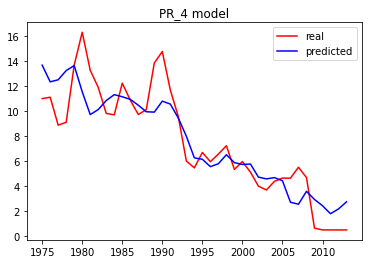

In [171]:
y_PR_4 = model_PR_4.predict(x_poly_4_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PR_4,'b')
plt.legend(['real','predicted'])
plt.title('PR_4 model')
plt.show()

In [172]:
def polyFit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' does not correspond to number of points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    Z = np.delete(Z, 0, axis=1) #don't need constant, as will add to model
    return Z, norm2, alpha


In [173]:
Z1, norm2, alpha = polyFit(X[:,0],degree = 2);
Z2, norm2, alpha = polyFit(X[:,1],degree = 2);
Z3, norm2, alpha = polyFit(X[:,2],degree = 2);
z = np.concatenate([Z1,Z2,Z3],axis=1)
z_new = sm.add_constant(z)

#### z_new.shape

In [174]:
model_PR_ortho = sm.OLS(y,z_new).fit()
model_PR_ortho.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     25.00
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           8.89e-11
Time:                        01:10:11   Log-Likelihood:                -77.733
No. Observations:                  39   AIC:                             169.5
Df Residuals:                      32   BIC:                             181.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5939      0.314     24.191      0.000       6.954       8.233
x1           -21.6360      3.551     -6.092      0.000     -28.870     -14.402
x2           -19.7619      3.127     -6.321      0.000     -26.131     -13.393
x3             1.2301      3.644      0.338      0.738      -6.193       8.653
x4             2.9475      2.665      1.106      0.277      -2.482       8.377
x5           -13.6496      3.485     -3.917      0.000     -20.748      -6.551
x6             2.5581      2.505      1.021      0.315      -2.544       7.660
==============================================================================
Omnibus:                        1.781   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.186
Skew:                           0.426   Prob(JB):                        0.553
Kurtosis:                       3.075   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

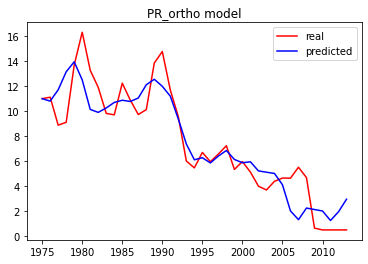

In [175]:
y_PR_ortho = model_PR_ortho.predict(z_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PR_ortho,'b')
plt.legend(['real','predicted'])
plt.title('PR_ortho model')
plt.show()

piecewise polynomial regression

In [176]:
def knots_finder(x,deg):
    m = deg-2
    if (deg<3):
        stop("degree of freedom has to be no less than 3")
    q = np.arange(0,deg,1)
    q = q/(deg-1)
    q = q[1:-1]
    
    k = np.quantile(x,q,axis = 0)
    return k

In [177]:
def pielinear(x,k,first = True):
    import numpy as np
    
    n = len(x)
    m = len(k)
    M = np.zeros((n,m+2))
    M[:,0] = np.ones(n)
    M[:,1] = x
    
    X = np.array([x for i in range(m)])
    X = X.T
    K = np.array([k for j in range(n)])
    M[:,2:] = np.maximum(X-K,np.zeros((n,m)))
    if first: #whether the keep the first columns of 1
        return M
    else:
        return M[:,1:]

In [178]:
def pielinear_multivari(x_vec,deg):
    k = knots_finder(x_vec,deg)
    dim = x_vec.shape[1]
    M = [pielinear(x_vec[:,i],k[:,i],first = False) for i in range(dim)]
    X_vec = np.concatenate(M, axis = 1)
    return X_vec

In [186]:
from math import *

In [204]:
def best_knots(y,x_vec):
    
    max_d = int(sqrt(x_vec.shape[0]))
    for d in range(max_d):
        X_vec = pielinear_multivari(x_vec,d+1+2)
        X_vec_new = sm.add_constant(X_vec)
        model = sm.OLS(y,X_vec_new).fit()
        aic_ = model.aic
        print(d,aic_)
        if d==0:
            aic = aic_
        if d != 0 and aic_ < aic:
            aic = aic_
            m_op = d+1
    return m_op,aic

In [205]:
best_knots(y,X)

0 192.511734110492
1 175.25353408552917
2 162.58791120971398
3 153.54701116617548
4 155.0713486225855
5 147.72086679189027


(6, 147.72086679189027)

In [199]:
X_vec = pielinear_multivari(X,deg = 4)
X_vec_new = sm.add_constant(X_vec)
model_PPR = sm.OLS(y,X_vec_new).fit()
model_PPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     15.20
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.21e-09
Time:                        01:14:29   Log-Likelihood:                -77.627
No. Observations:                  39   AIC:                             175.3
Df Residuals:                      29   BIC:                             191.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5410     10.160     -0.349      0.730     -24.320      17.238
x1           2.42e-06   9.71e-07      2.492      0.019    4.34e-07    4.41e-06
x2         -7.067e-06   1.45e-06     -4.859      0.000      -1e-05   -4.09e-06
x3          3.677e-06   2.87e-06      1.280      0.211    -2.2e-06    9.55e-06
x4            -0.0002      0.000     -0.834      0.411      -0.001       0.000
x5             0.0002      0.000      0.664      0.512      -0.000       0.001
x6          9.548e-05      0.000      0.789      0.436      -0.000       0.000
x7             0.5927      1.809      0.328      0.746      -3.107       4.293
x8            -1.9537      2.026     -0.964      0.343      -6.097       2.190
x9             0.9999      0.918      1.089      0.285      -0.878       2.877
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.375
Skew:                          -0.202   Prob(JB):                        0.829
Kurtosis:                       2.739   Cond. No.                     3.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

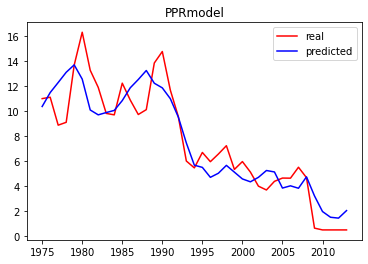

In [200]:
y_PPR = model_PPR.predict(X_vec_new)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PPR,'b')
plt.legend(['real','predicted'])
plt.title('PPRmodel')
plt.show()

In [208]:
X_vec_2 = pielinear_multivari(X,deg = 6)
X_vec_new_2 = sm.add_constant(X_vec_2)
model_PPR_2 = sm.OLS(y,X_vec_new_2).fit()
model_PPR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     19.28
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.50e-09
Time:                        01:16:44   Log-Likelihood:                -60.774
No. Observations:                  39   AIC:                             153.5
Df Residuals:                      23   BIC:                             180.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8053     11.126     -0.072      0.943     -23.820      22.210
x1          5.154e-06      2e-06      2.575      0.017    1.01e-06    9.29e-06
x2         -6.007e-06   3.13e-06     -1.918      0.068   -1.25e-05    4.72e-07
x3         -4.494e-06      2e-06     -2.250      0.034   -8.63e-06   -3.61e-07
x4         -1.387e-06   2.98e-06     -0.465      0.646   -7.55e-06    4.78e-06
x5          1.168e-05   4.65e-06      2.509      0.020    2.05e-06    2.13e-05
x6            -0.0004      0.001     -0.636      0.531      -0.002       0.001
x7             0.0005      0.001      0.818      0.422      -0.001       0.002
x8            -0.0003      0.000     -1.116      0.276      -0.001       0.000
x9             0.0002      0.000      1.100      0.283      -0.000       0.001
x10        -4.136e-05      0.000     -0.332      0.743      -0.000       0.000
x11           -2.8924      1.924     -1.503      0.146      -6.872       1.087
x12            4.7841      2.588      1.848      0.077      -0.570      10.138
x13           -4.4434      2.670     -1.664      0.110      -9.967       1.080
x14            2.4360      1.640      1.486      0.151      -0.956       5.828
x15           -0.9475      1.534     -0.618      0.543      -4.121       2.226
==============================================================================
Omnibus:                        4.900   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                3.529
Skew:                          -0.650   Prob(JB):                        0.171
Kurtosis:                       3.693   Cond. No.                     4.83e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

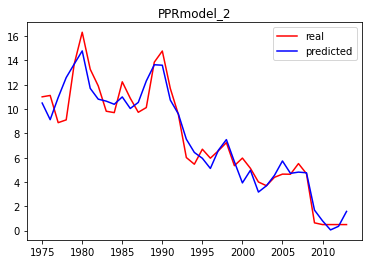

In [136]:
y_PPR_2 = model_PPR_2.predict(X_vec_new_2)
# plt.scatter(y, y_SLR)
plt.plot(merged_df_2['year'],y,'r')
plt.plot(merged_df_2['year'],y_PPR_2,'b')
plt.legend(['real','predicted'])
plt.title('PPRmodel_2')
plt.show()

In [138]:
merged_df_2

,year,num_mortage,num_possession,Unemployment rate,IR rate
0,1975,5076000.0,4870.0,4.5,11.0000
1,1976,5322000.0,4950.0,5.4,11.1137
2,1977,5582000.0,4680.0,5.6,8.8772
3,1978,5896000.0,4130.0,5.5,9.1059
4,1979,6058000.0,2910.0,5.4,13.6863
5,1980,6210000.0,3480.0,6.8,16.3091
6,1981,6336000.0,4870.0,9.6,13.2684
7,1982,6518000.0,6900.0,10.7,11.8980
8,1983,6846000.0,8400.0,11.5,9.8175
9,1984,7313000.0,12400.0,11.8,9.7018


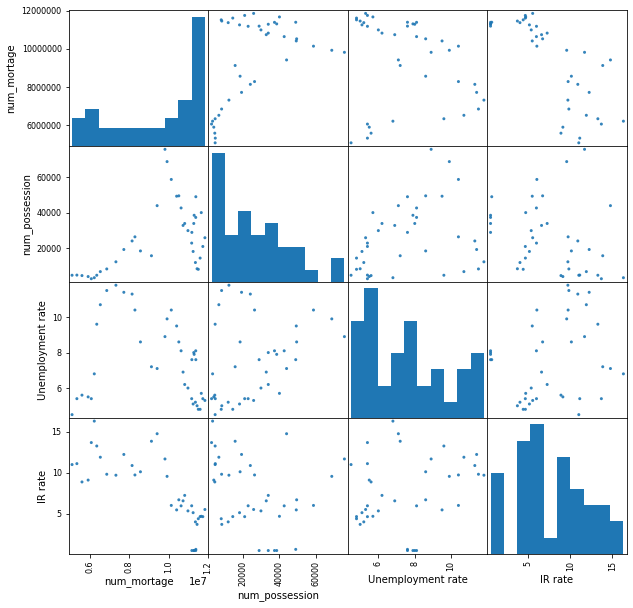

In [141]:
pd.plotting.scatter_matrix(merged_df_2.iloc[:,1:], alpha = 0.9, figsize= (10,10));

In [142]:
merged_df_2.iloc[:,1:].corr()

,num_mortage,num_possession,Unemployment rate,IR rate
num_mortage,1.000000,0.529258,-0.226738,-0.760988
num_possession,0.529258,1.000000,0.304026,-0.285785
Unemployment rate,-0.226738,0.304026,1.000000,0.242834
IR rate,-0.760988,-0.285785,0.242834,1.000000
